In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
maths_df = pd.read_csv('/Users/adityakinjawadekar/Documents/100xdata/1-multiple-linear-regresion/dataset/student-mat.csv', delimiter=';')
portuguese_df = pd.read_csv('/Users/adityakinjawadekar/Documents/100xdata/1-multiple-linear-regresion/dataset/student-por.csv', delimiter=';')


### Starting with maths df

In [4]:
    # maths_df.school.isnull().sum()
    for i in maths_df.columns:
        print(f" {i}   {maths_df[i].isnull().sum()} ")


 school   0 
 sex   0 
 age   0 
 address   0 
 famsize   0 
 Pstatus   0 
 Medu   0 
 Fedu   0 
 Mjob   0 
 Fjob   0 
 reason   0 
 guardian   0 
 traveltime   0 
 studytime   0 
 failures   0 
 schoolsup   0 
 famsup   0 
 paid   0 
 activities   0 
 nursery   0 
 higher   0 
 internet   0 
 romantic   0 
 famrel   0 
 freetime   0 
 goout   0 
 Dalc   0 
 Walc   0 
 health   0 
 absences   0 
 G1   0 
 G2   0 
 G3   0 


In [5]:
# maths_df.info()
columns = maths_df.columns
categorical_data = []
numeric_data = []
for index,value in enumerate(maths_df):
    if(maths_df[value].dtype == 'object'):
        categorical_data.append(value)
    else:
        numeric_data.append(value)


### Univariate Analysis

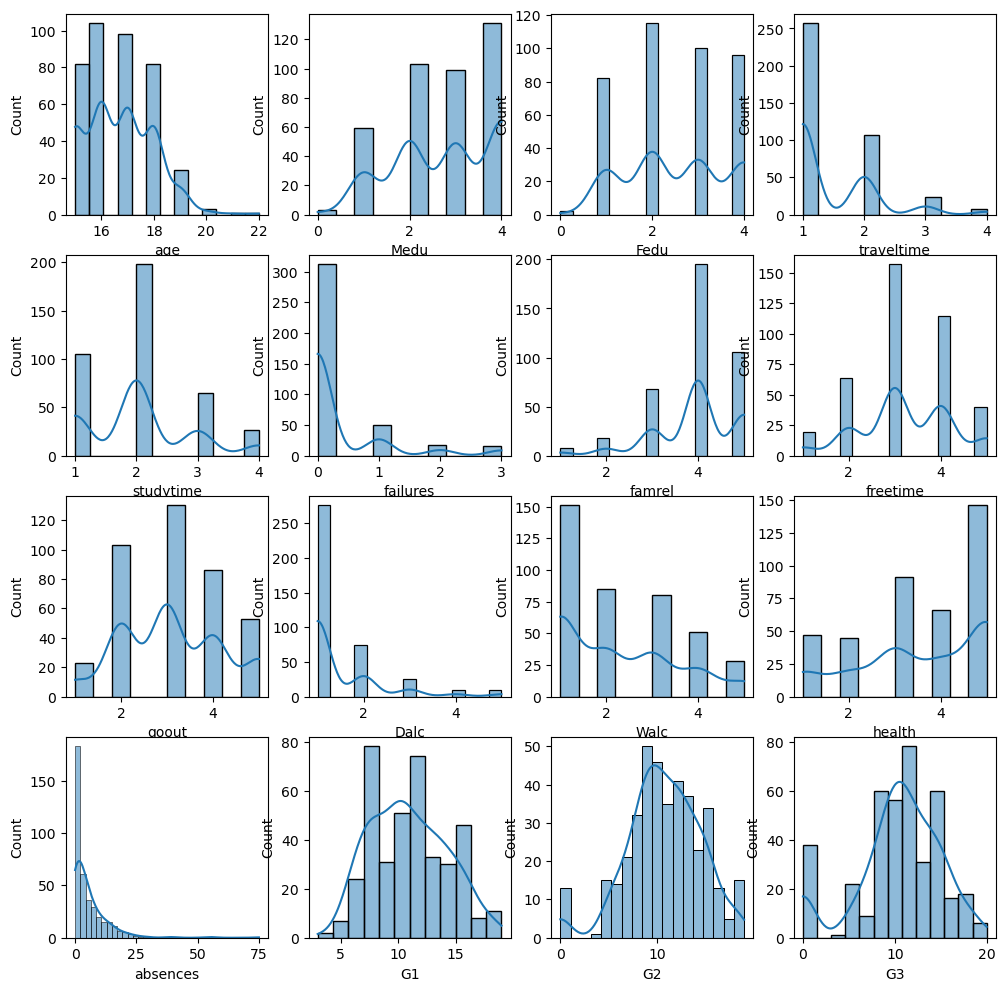

In [6]:
plt.figure(figsize=(12,12))
for index,value in enumerate(numeric_data):
    plt.subplot(4,4,index+1)
    sns.histplot(maths_df[value],kde=True)

In [10]:
for value in maths_df.columns:
    print(f"{value}, {maths_df[value].unique()}")

school, ['GP' 'MS']
sex, ['F' 'M']
age, [18 17 15 16 19 22 20 21]
address, ['U' 'R']
famsize, ['GT3' 'LE3']
Pstatus, ['A' 'T']
Medu, [4 1 3 2 0]
Fedu, [4 1 2 3 0]
Mjob, ['at_home' 'health' 'other' 'services' 'teacher']
Fjob, ['teacher' 'other' 'services' 'health' 'at_home']
reason, ['course' 'other' 'home' 'reputation']
guardian, ['mother' 'father' 'other']
traveltime, [2 1 3 4]
studytime, [2 3 1 4]
failures, [0 3 2 1]
schoolsup, ['yes' 'no']
famsup, ['no' 'yes']
paid, ['no' 'yes']
activities, ['no' 'yes']
nursery, ['yes' 'no']
higher, ['yes' 'no']
internet, ['no' 'yes']
romantic, ['no' 'yes']
famrel, [4 5 3 1 2]
freetime, [3 2 4 1 5]
goout, [4 3 2 1 5]
Dalc, [1 2 5 3 4]
Walc, [1 3 2 4 5]
health, [3 5 1 2 4]
absences, [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1, [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2, [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3, [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

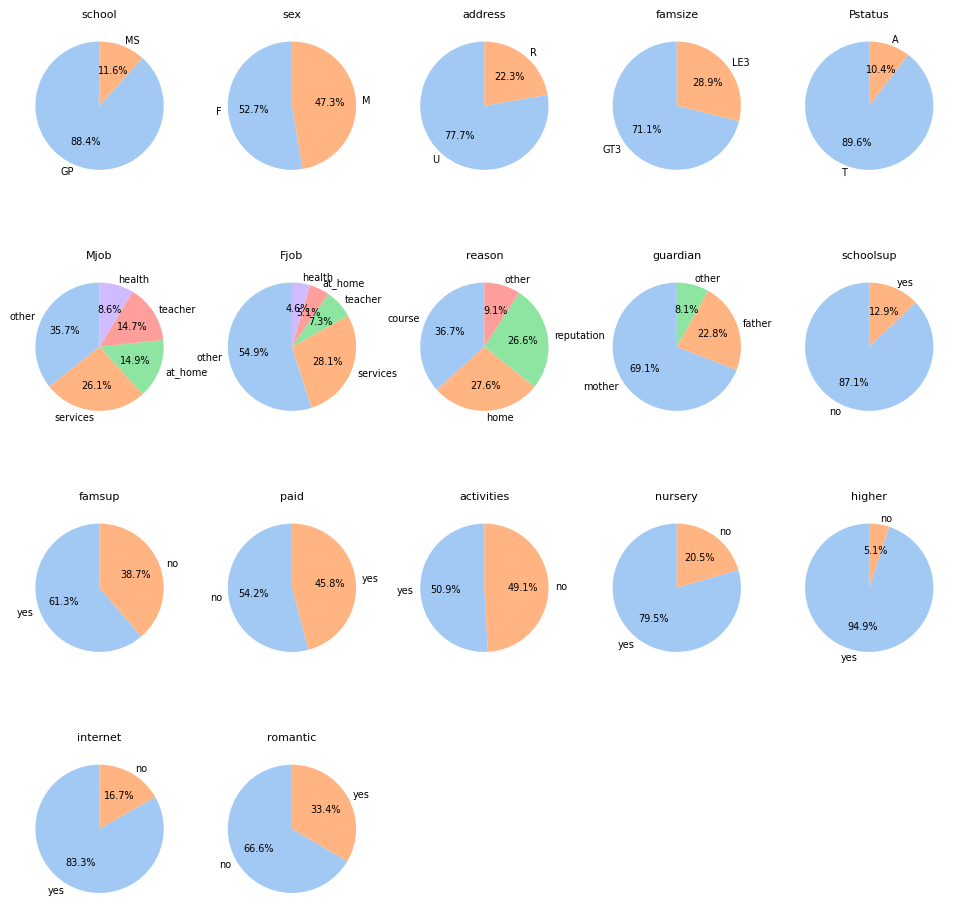

In [8]:
plt.figure(figsize=(12,12))
for i,value in enumerate(categorical_data):
    plt.subplot(4,5,i+1)
    maths_df[value].value_counts().plot.pie(autopct='%0.1f%%', startangle=90, colors=sns.color_palette("pastel"),textprops={'fontsize': 7})
    plt.title(value,fontsize=8)
    plt.ylabel("")

### Bivariate Analysis

In [21]:

!pip install termcolor


<Axes: xlabel='school', ylabel='G3'>

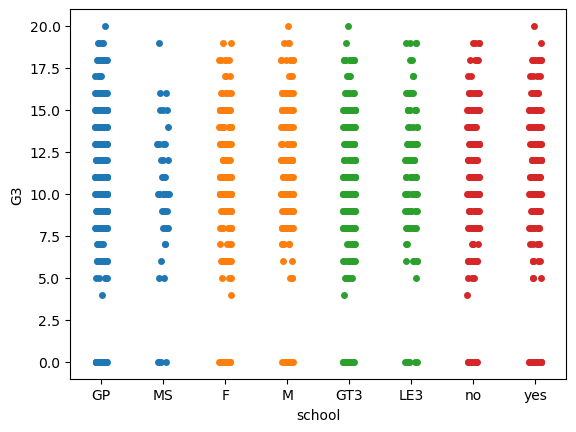

In [28]:
#school and g3
from termcolor import colored
sns.stripplot(data=maths_df, x='school', y='G3')
sns.stripplot(data=maths_df, x='sex', y='G3')
sns.stripplot(data=maths_df, x='famsize', y='G3')
sns.stripplot(data=maths_df, x='activities', y='G3')
sns.stripplot(data=maths_df, x='', y='G3')


### Multivariate analysis

<Axes: >

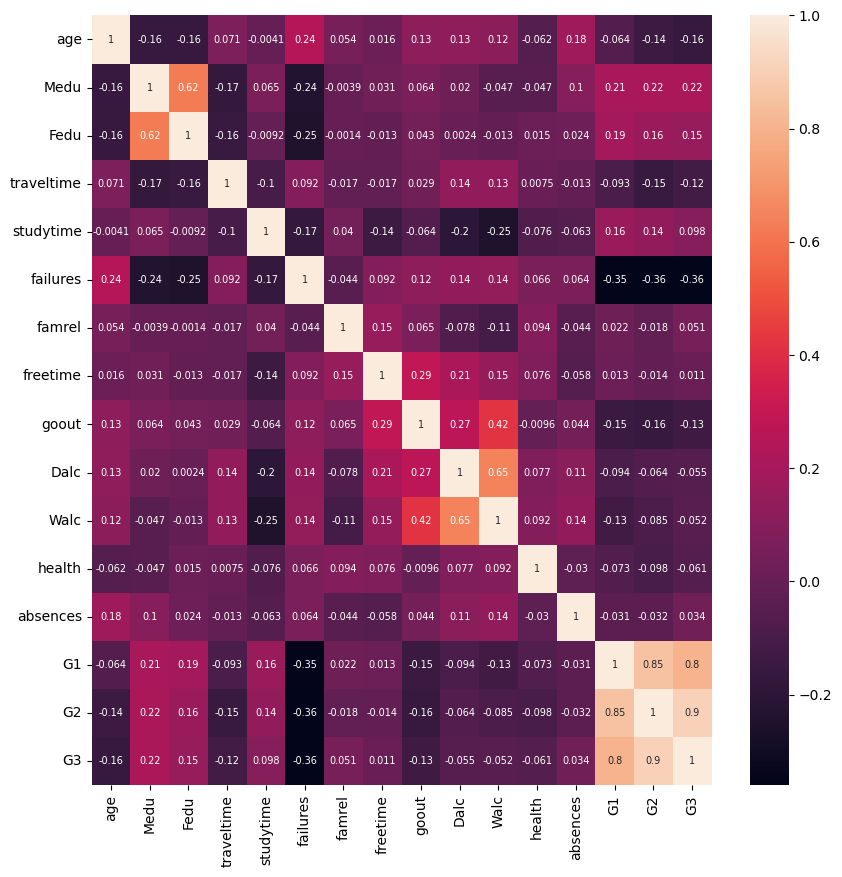

In [32]:
corr = maths_df[numeric_data].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,annot_kws={'size': 7})

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [63]:
categorical_frame = maths_df[categorical_data]
# encoded_frame = pd.get_dummies(categorical_frame,drop_first=True)
for column in categorical_frame.columns:
    categorical_frame[column] = encoder.fit_transform(categorical_frame[column])
# encoded_frame = encoded_frame.astype(int)
final = pd.concat([categorical_frame,maths_df[numeric_data]],axis=1)
final

/var/folders/c8/5_65kmhs1x1fqyqjjb585tc40000gn/T/ipykernel_59892/326155907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_frame[column] = encoder.fit_transform(categorical_frame[column])
/var/folders/c8/5_65kmhs1x1fqyqjjb585tc40000gn/T/ipykernel_59892/326155907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_frame[column] = encoder.fit_transform(categorical_frame[column])
/var/folders/c8/5_65kmhs1x1fqyqjjb585tc40000gn/T/ipykernel_59892/326155907.py:4: SettingWithCopyWarning:

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1,0,0,0,4,0,1,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,1,0,1,0,2,0,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,1,1,1,0,2,2,1,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,1,0,1,1,3,1,1,0,...,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,1,2,2,1,0,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,...,5,5,4,4,5,4,11,9,9,9
391,1,1,1,1,1,3,3,0,1,0,...,2,4,5,3,4,2,3,14,16,16
392,1,1,0,0,1,2,2,0,2,0,...,5,5,3,3,3,3,3,10,8,7
393,1,1,0,1,1,3,2,0,1,0,...,4,4,1,3,4,5,0,11,12,10


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X = final.drop(columns=['G3'])
y = final['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [80]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(colored(f'R-squared: {r2}','red'))

# print(f'Coefficients (slope) for each feature: {model.coef_}')
# print(f'Intercept (y-intercept): {model.intercept_}')



Mean Squared Error: 4.568258792977685
R-squared: 0.8017064030489106
